#import libraries

In [26]:
import pandas as pd
import os
import json
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# load data

In [27]:
# Load the dataset
df = pd.read_csv("C:\\Users\\CAPACITI-JHB\\Downloads\\student_program_data_governance.csv")
df 

,Student_ID,Full_Name,Email,Program,Enrollment_Year,GPA,Graduated
0,STU1000,Megan Saunders,tvaughan@holmes.com,Cloud Computing,2023,2.80,No
1,STU1001,Amanda Taylor,sarahenderson@russo.info,Cloud Computing,2025,3.43,No
2,STU1002,Paul Hester,egonzalez@gmail.com,AI & ML,2024,2.04,Yes
3,STU1003,Christopher Ruiz,monroeandrea@gmail.com,Cloud Computing,2022,2.14,No
4,STU1004,Karla Johnson,lindsay24@hotmail.com,Cloud Computing,2024,2.28,Yes
...,...,...,...,...,...,...,...
95,STU1095,William Diaz,kelly77@baker.com,Business Intelligence,2025,2.02,No
96,STU1096,Amber Williamson,donald62@bennett.biz,Cybersecurity,2024,2.12,Yes
97,STU1097,James Deleon,beckbrandon@turner.info,AI & ML,2024,3.72,Yes
98,STU1098,Mr. Daniel Williams,julie52@hotmail.com,Cloud Computing,2022,3.77,Yes


# 1. Define a metadata strategy for this dataset. What metadata fields are critical for maintaining this dataset's integrity (e.g., creation date, data owner, field descriptions)

In [28]:
1.# Use the file path for file operations
metadata = {
    "Dataset Name": os.path.basename("C:\\Users\\CAPACITI-JHB\\Downloads\\student_program_data_governance.csv"),
    "Creation Date": datetime.fromtimestamp(os.path.getctime("C:\\Users\\CAPACITI-JHB\\Downloads\\student_program_data_governance.csv")).strftime('%Y-%m-%d'),
    "Last Modified Date": datetime.fromtimestamp(os.path.getmtime("C:\\Users\\CAPACITI-JHB\\Downloads\\student_program_data_governance.csv")).strftime('%Y-%m-%d'),
    "File Format": "CSV",
    "Total Records": len(df),
    "Total Columns": len(df.columns),
    "Data Owner": "Registrar’s Office",
    "Data Steward": "Your Name (Data Steward)",
    "Confidentiality Level": "High (Contains PII)",
    "Source System": "Student Information System",
    "Retention Policy": "5 years after graduation",
}

# Display metadata as a table
metadata_df = pd.DataFrame(list(metadata.items()), columns=["Metadata Field", "Value"])
print(metadata_df)

           Metadata Field                                Value
0            Dataset Name  student_program_data_governance.csv
1           Creation Date                           2025-06-26
2      Last Modified Date                           2025-06-26
3             File Format                                  CSV
4           Total Records                                  100
5           Total Columns                                    7
6              Data Owner                   Registrar’s Office
7            Data Steward             Your Name (Data Steward)
8   Confidentiality Level                  High (Contains PII)
9           Source System           Student Information System
10       Retention Policy             5 years after graduation


# 2. Create a sample data dictionary for at least 6 columns in the dataset, including data types, allowed values, and business meanings

In [29]:
# Create a sample data dictionary for 6 fields
data_dictionary = [
    {
        "Field Name": "Student_ID",
        "Data Type": "String",
        "Allowed Values": "Alphanumeric (e.g., STU1001)",
        "Business Meaning": "Unique student identifier used across institutional systems"
    },
    {
        "Field Name": "Full_Name",
        "Data Type": "String",
        "Allowed Values": "Alphabetic characters and spaces",
        "Business Meaning": "Student’s full legal name for documentation and communication"
    },
    {
        "Field Name": "Email",
        "Data Type": "String",
        "Allowed Values": "Valid email format (e.g., name@domain.com)",
        "Business Meaning": "Official institutional contact address"
    },
    {
        "Field Name": "Program",
        "Data Type": "String",
        "Allowed Values": "AI & ML, Data Science, Cyber Security, Web Dev, Cloud Computing",
        "Business Meaning": "Academic program or specialization"
    },
    {
        "Field Name": "Enrollment_Year",
        "Data Type": "Integer",
        "Allowed Values": "2022 to 2025",
        "Business Meaning": "The year when the student enrolled at the institution"
    },
    {
        "Field Name": "GPA",
        "Data Type": "Float",
        "Allowed Values": "2.0 to 4.0",
        "Business Meaning": "Grade Point Average representing academic performance"
    }
]

# Convert to a DataFrame
data_dict_df = pd.DataFrame(data_dictionary)

# Display the DataFrame
print(data_dict_df)

        Field Name Data Type  \
0       Student_ID    String   
1        Full_Name    String   
2            Email    String   
3          Program    String   
4  Enrollment_Year   Integer   
5              GPA     Float   

                                      Allowed Values  \
0                       Alphanumeric (e.g., STU1001)   
1                   Alphabetic characters and spaces   
2         Valid email format (e.g., name@domain.com)   
3  AI & ML, Data Science, Cyber Security, Web Dev...   
4                                       2022 to 2025   
5                                         2.0 to 4.0   

                                    Business Meaning  
0  Unique student identifier used across institut...  
1  Student’s full legal name for documentation an...  
2             Official institutional contact address  
3                 Academic program or specialization  
4  The year when the student enrolled at the inst...  
5  Grade Point Average representing academic perf...

# 3. Trace the data lineage for the GPA column—what data sources might have fed into it, and what systems or processes would update it

In [30]:
# Simulated lineage trace for the GPA column
gpa_lineage = [
    {
        "Step": 1,
        "Stage": "Source System",
        "System": "Learning Management System (LMS)",
        "Details": "Raw course scores entered by instructors per subject per semester"
    },
    {
        "Step": 2,
        "Stage": "Processing",
        "System": "Grade Aggregation Engine",
        "Details": "Calculates course-level GPAs, applies weightings and credit hours"
    },
    {
        "Step": 3,
        "Stage": "Transformation",
        "System": "Academic Record System",
        "Details": "Aggregates individual course grades into cumulative GPA"
    },
    {
        "Step": 4,
        "Stage": "Data Storage",
        "System": "Student Information System (SIS)",
        "Details": "Stores GPA along with student records and personal info"
    },
    {
        "Step": 5,
        "Stage": "Dataset Export",
        "System": "EduTrack Data Warehouse or CSV extract",
        "Details": "Extracted as part of regular reporting or data analysis"
    }
]

# Convert to DataFrame for display
gpa_lineage_df = pd.DataFrame(gpa_lineage)

# Display the data lineage
print(gpa_lineage_df)


   Step           Stage                                  System  \
0     1   Source System        Learning Management System (LMS)   
1     2      Processing                Grade Aggregation Engine   
2     3  Transformation                  Academic Record System   
3     4    Data Storage        Student Information System (SIS)   
4     5  Dataset Export  EduTrack Data Warehouse or CSV extract   

                                             Details  
0  Raw course scores entered by instructors per s...  
1  Calculates course-level GPAs, applies weightin...  
2  Aggregates individual course grades into cumul...  
3  Stores GPA along with student records and pers...  
4  Extracted as part of regular reporting or data...  


# 4. Identify any data quality issues you observe (duplicates, outliers, missing values) and propose a data cleansing strategy.

In [31]:
#  Check for duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:\n", duplicates)

Duplicate Rows:
 Empty DataFrame
Columns: [Student_ID, Full_Name, Email, Program, Enrollment_Year, GPA, Graduated]
Index: []


In [32]:
#  Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Student_ID         0
Full_Name          0
Email              0
Program            0
Enrollment_Year    0
GPA                0
Graduated          0
dtype: int64


In [33]:
# Summary statistics to detect outliers
summary_stats = df.describe()
df

,Student_ID,Full_Name,Email,Program,Enrollment_Year,GPA,Graduated
0,STU1000,Megan Saunders,tvaughan@holmes.com,Cloud Computing,2023,2.80,No
1,STU1001,Amanda Taylor,sarahenderson@russo.info,Cloud Computing,2025,3.43,No
2,STU1002,Paul Hester,egonzalez@gmail.com,AI & ML,2024,2.04,Yes
3,STU1003,Christopher Ruiz,monroeandrea@gmail.com,Cloud Computing,2022,2.14,No
4,STU1004,Karla Johnson,lindsay24@hotmail.com,Cloud Computing,2024,2.28,Yes
...,...,...,...,...,...,...,...
95,STU1095,William Diaz,kelly77@baker.com,Business Intelligence,2025,2.02,No
96,STU1096,Amber Williamson,donald62@bennett.biz,Cybersecurity,2024,2.12,Yes
97,STU1097,James Deleon,beckbrandon@turner.info,AI & ML,2024,3.72,Yes
98,STU1098,Mr. Daniel Williams,julie52@hotmail.com,Cloud Computing,2022,3.77,Yes


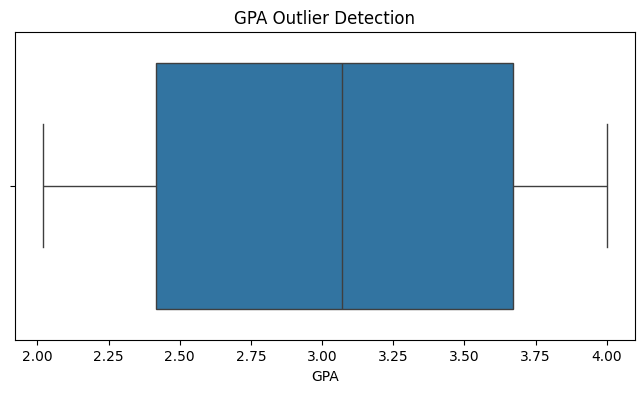

In [ ]:
# Visualize GPA outliers 
if 'GPA' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['GPA'])
    plt.title("GPA Outlier Detection")
    plt.show()

In [35]:
# Detect outliers in GPA using IQR method
Q1 = df["GPA"].quantile(0.25)
Q3 = df["GPA"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["GPA"] < Q1 - 1.5 * IQR) | (df["GPA"] > Q3 + 1.5 * IQR)]
print("\nOutliers in GPA:\n", outliers[["Student_ID", "GPA"]])


Outliers in GPA:
 Empty DataFrame
Columns: [Student_ID, GPA]
Index: []


In [41]:
#  Data Cleansing Strategy
cleansing_strategy = {
    "Missing Values": "Use imputation (mean/mode) for numerical/categorical fields or drop rows if minimal.",
    "Duplicates": "Remove duplicate rows using df.drop_duplicates().",
    "Outliers": "Cap/floor outliers using IQR method or apply domain-specific thresholds for GPA.",
    "Inconsistent Values": "Standardize values (e.g., 'Maths' vs 'Mathematics') using mapping or fuzzy matching.",
    "Data Types": "Ensure correct data types (e.g., GPA as float, Year as int).",
}

# Print results
print("\nSummary Statistics:\n", summary_stats)
print("\nProposed Data Cleansing Strategy:\n")
for issue, strategy in cleansing_strategy.items():
    print(f"- {issue}: {strategy}")


Summary Statistics:
        Enrollment_Year         GPA
count       100.000000  100.000000
mean       2023.580000    3.057000
std           1.190705    0.645554
min        2022.000000    2.020000
25%        2022.000000    2.417500
50%        2024.000000    3.070000
75%        2025.000000    3.670000
max        2025.000000    4.000000

Proposed Data Cleansing Strategy:

- Missing Values: Use imputation (mean/mode) for numerical/categorical fields or drop rows if minimal.
- Duplicates: Remove duplicate rows using df.drop_duplicates().
- Outliers: Cap/floor outliers using IQR method or apply domain-specific thresholds for GPA.
- Inconsistent Values: Standardize values (e.g., 'Maths' vs 'Mathematics') using mapping or fuzzy matching.
- Data Types: Ensure correct data types (e.g., GPA as float, Year as int).


# 5.Simulate a data catalog entry for this dataset. Include fields such as dataset name, description, department owner, access level, and usage policy.

In [36]:
# Simulated Data Catalog Entry for student_program_data_governance.csv

data_catalog_entry = {
    "dataset_name": "Student Program Data Governance",
    "description": (
        "This dataset contains information about student academic performance, "
        "program enrollment, and departmental affiliations. It includes fields such as "
        "student ID, GPA, department, academic year, and program type. "
        "The data is used for academic analytics, performance monitoring, and reporting purposes."
    ),
    "department_owner": {
        "name": "Academic Affairs – Office of Institutional Research",
        "contact": "research.office@university.ac.za"
    },
    "data_steward": {
        "name": "Thandiwe Mokoena",
        "role": "Data Quality and Compliance Officer",
        "email": "thandiwe.mokoena@university.ac.za"
    },
    "access_level": "Restricted Internal",
    "usage_policy": {
        "internal_use": True,
        "external_sharing": "Prohibited unless approved",
        "compliance": ["Institutional Data Privacy Policy", "POPIA"],
        "modification_policy": "Changes must be documented and reviewed",
        "retention_period": "5 years after student program completion"
    },
    "last_updated": "2025-06-25",
    "data_source": "University Academic Management System (UAMS)",
    "data_sensitivity_level": "Moderate – Contains personally identifiable academic records"
}

# Display the catalog entry
import pprint
pprint.pprint(data_catalog_entry)


{'access_level': 'Restricted Internal',
 'data_sensitivity_level': 'Moderate – Contains personally identifiable '
                           'academic records',
 'data_source': 'University Academic Management System (UAMS)',
 'data_steward': {'email': 'thandiwe.mokoena@university.ac.za',
                  'name': 'Thandiwe Mokoena',
                  'role': 'Data Quality and Compliance Officer'},
 'dataset_name': 'Student Program Data Governance',
 'department_owner': {'contact': 'research.office@university.ac.za',
                      'name': 'Academic Affairs – Office of Institutional '
                              'Research'},
 'description': 'This dataset contains information about student academic '
                'performance, program enrollment, and departmental '
                'affiliations. It includes fields such as student ID, GPA, '
                'department, academic year, and program type. The data is used '
                'for academic analytics, performance mon

# 6. Discuss the roles of a data steward vs a data owner in managing this dataset, and provide a real-world example of their collaboration. 

In [37]:
# Roles and Responsibilities in Data Governance

roles_responsibility = {
    "Data_Owner": {
        "Role": "Accountable for the overall quality, access, and security of the dataset.",
        "Responsibilities": [
            "Define who can access the data and under what conditions",
            "Approve data usage and sharing requests",
            "Ensure compliance with legal and institutional policies",
            "Make decisions about data retention and archival"
        ],
        "Typical_Job_Title": "Head of Academic Affairs / Director of Institutional Research"
    },
    "Data_Steward": {
        "Role": "Responsible for the day-to-day management, quality, and integrity of the dataset.",
        "Responsibilities": [
            "Validate data accuracy and consistency",
            "Monitor data quality issues (e.g., missing GPA values or invalid department names)",
            "Implement standards and metadata documentation",
            "Support users with data understanding and usage"
        ],
        "Typical_Job_Title": "Data Analyst / Compliance Officer / Metadata Manager"
    },
    "Collaboration_Example": {
        "Scenario": (
            "A data analyst (Data Steward) identifies inconsistent department names in the dataset "
            "(e.g., 'Maths' vs 'Mathematics'). They report this issue to the Data Owner for approval to "
            "standardize the naming. The Data Owner evaluates the request, confirms the official naming conventions, "
            "and authorizes the data cleansing. Both roles document the changes for audit and future governance."
        )
    }
}

# Display the roles and example
pprint.pprint(roles_responsibility)


{'Collaboration_Example': {'Scenario': 'A data analyst (Data Steward) '
                                       'identifies inconsistent department '
                                       "names in the dataset (e.g., 'Maths' vs "
                                       "'Mathematics'). They report this issue "
                                       'to the Data Owner for approval to '
                                       'standardize the naming. The Data Owner '
                                       'evaluates the request, confirms the '
                                       'official naming conventions, and '
                                       'authorizes the data cleansing. Both '
                                       'roles document the changes for audit '
                                       'and future governance.'},
 'Data_Owner': {'Responsibilities': ['Define who can access the data and under '
                                     'what conditions',
                   

In [38]:

class DataSteward:
    def __init__(self, name):
        self.name = name

    def anonymize_gender(self, dataset):
        print(f"[Data Steward: {self.name}] Anonymizing gender column...")
        dataset['gender'] = dataset['gender'].apply(lambda x: "Group A" if x.lower().startswith("m") else "Group B")
        return dataset

    def update_catalog_entry(self, catalog_entry):
        catalog_entry['last_updated'] = "2025-06-26"
        catalog_entry['usage_policy']['restrictions'].append("Gender is anonymized for external use.")
        print("Data catalog entry updated.\n")


In [39]:

data = {
    "student_id": [1, 2, 3],
    "name": ["Alice", "Bob", "Charlie"],
    "gender": ["Female", "Male", "Male"],
    "GPA": [3.5, 2.8, 3.9]
}
df = pd.DataFrame(data)